In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [3]:
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

gdp_df.shape

7662 rows, 4 columns

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

gdp_df.drop('Value Footnotes', axis = 1)

Option 2 - using .pop()
gdp_df.pop('Value Footnotes')

In [4]:
gdp_df.columns=['Country', 'Year','GDP_Per_Capita','VF']

In [5]:
gdp_df = gdp_df.drop(columns=['VF'])

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_Per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


How many countries have data for all years?

In [80]:
gdp_df['Year'].nunique()

33

In [7]:
count_by_country_year = gdp_df.groupby('Country')['Year'].nunique()
all_year_count = gdp_df['Year'].nunique()
countries_without_missing = count_by_country_year[count_by_country_year == all_year_count]

corrected code:
gdp_df_year_counts = gdp_df.groupby(['Country']).count().sort_values(by = 'Year')
gdp_df_year_counts

In [8]:
print(countries_without_missing.count())

202


In [9]:
countries_missing_years = count_by_country_year[count_by_country_year <= (all_year_count - 2)].index
print(countries_missing_years)

Index(['Afghanistan', 'Bosnia and Herzegovina', 'Cambodia', 'Cayman Islands',
       'Croatia', 'CuraÃ§ao', 'Djibouti', 'Estonia', 'Iceland', 'Israel',
       'Kosovo', 'Kuwait', 'Latvia', 'Liberia', 'Libya', 'Lithuania',
       'Maldives', 'Moldova', 'Montenegro', 'Nauru', 'Other small states',
       'Palau', 'Qatar', 'San Marino', 'Serbia', 'Sint Maarten (Dutch part)',
       'Slovak Republic', 'Slovenia', 'Small states', 'Somalia',
       'SÃ£o TomÃ© and Principe', 'Timor-Leste', 'Turkmenistan',
       'Turks and Caicos Islands', 'West Bank and Gaza'],
      dtype='object', name='Country')


In [10]:
observations_for_every_year = gdp_df['Year'].value_counts().sort_index()
print(observations_for_every_year)

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [11]:
gdp_per_capita_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_per_capita_2020

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764
...,...,...,...
7503,Viet Nam,2020,10450.622382
7536,West Bank and Gaza,2020,5402.538773
7565,World,2020,16204.169107
7598,Zambia,2020,3183.650773


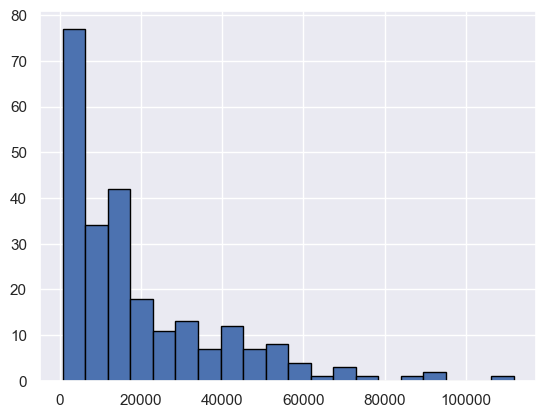

In [82]:
plt.hist(gdp_per_capita_2020['GDP_Per_Capita'], bins = 20, edgecolor = 'black')
plt.show()

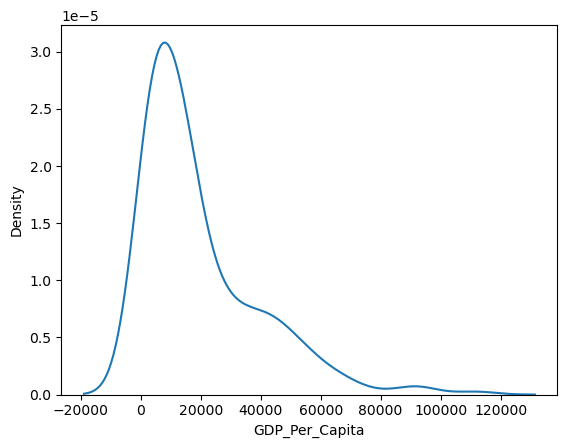

In [13]:
sns.kdeplot(gdp_per_capita_2020.GDP_Per_Capita)
plt.show()

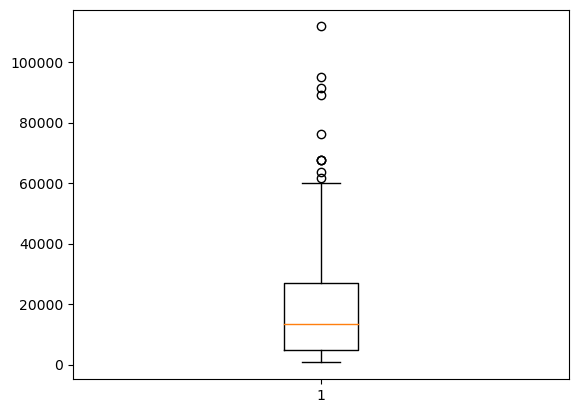

In [14]:
plt.boxplot(gdp_per_capita_2020.GDP_Per_Capita)
plt.show()

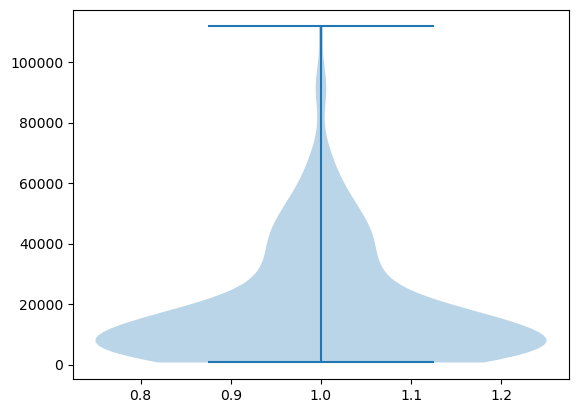

In [15]:
plt.violinplot(gdp_per_capita_2020.GDP_Per_Capita)
plt.show()

9. What was the median GDP per capita value in 2020?

In [16]:
med_gdp_2020 = gdp_per_capita_2020['GDP_Per_Capita'].median()
med_gdp_2020

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [17]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990,2000,2010,2020])]
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


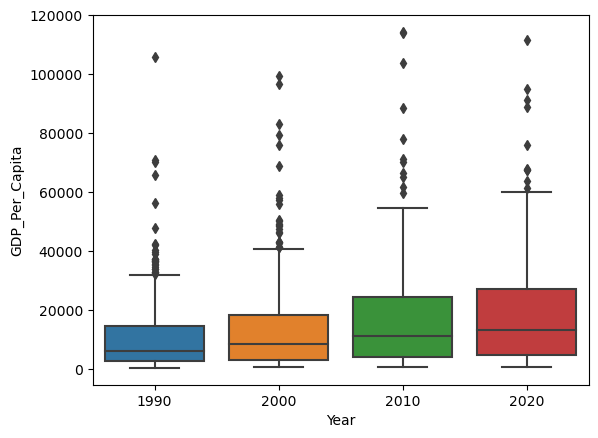

In [18]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])
plt.show()

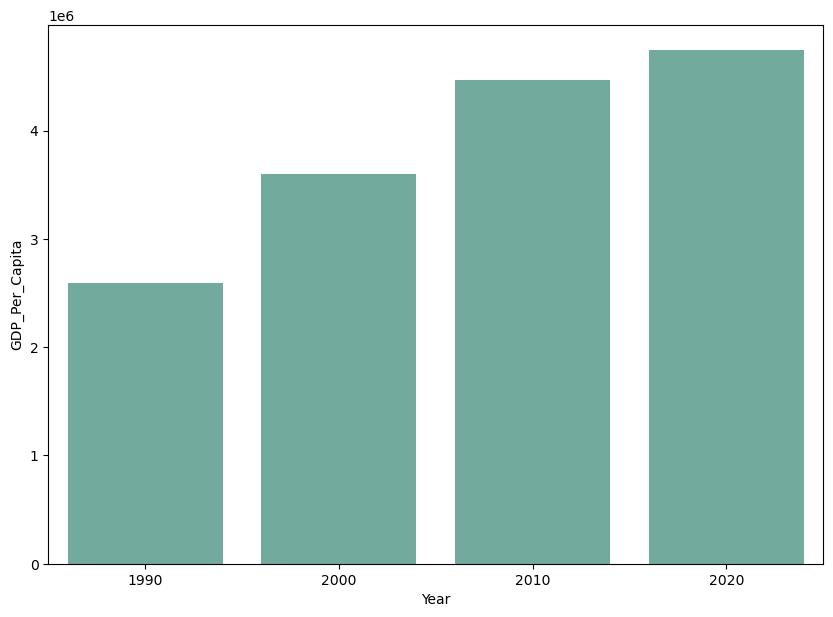

In [19]:
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Year", 
    y="GDP_Per_Capita", 
    data=gdp_decades, 
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2');

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

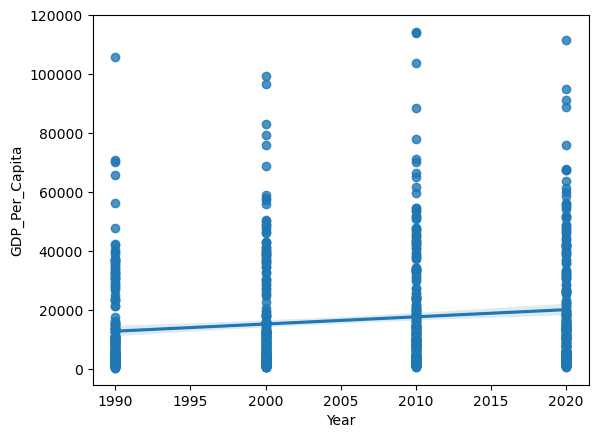

In [20]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"])

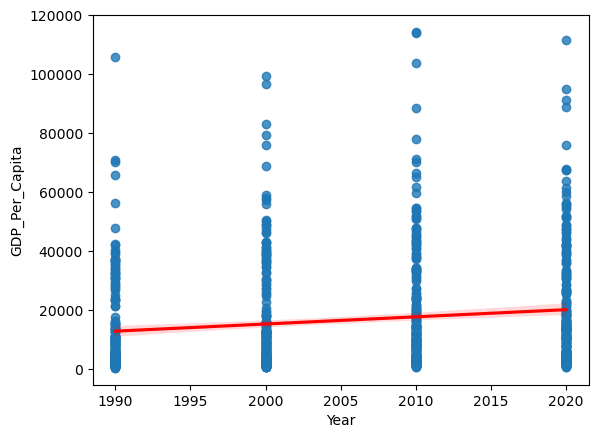

In [21]:
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"},
#     ax=ax
)
plt.show()

Seems like the gdp per capita grew each year. The advantage to the bar graph is the readability. The disadvantage to the scatterplots is the individual data points in each column being so closely grouped.

11. Which country was the first to have a GDP per capita greater than $100,000?

In [87]:
gdp_greater_than = gdp_df[gdp_df['GDP_Per_Capita']>=100000].reset_index(drop=True)

United Arab Emirates

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset

In [23]:
highest_gdp_2020 = gdp_per_capita_2020.sort_values('GDP_Per_Capita', ascending=False)
#Luxembourg
print(highest_gdp_2020)

                       Country  Year  GDP_Per_Capita
4148                Luxembourg  2020   111751.314751
6108                 Singapore  2020    94910.101431
3279                   Ireland  2020    91356.855054
5746                     Qatar  2020    89019.069857
681                    Bermuda  2020    76117.804744
...                        ...   ...             ...
5074                     Niger  2020     1214.546556
6273                   Somalia  2020     1127.418534
1630           Dem. Rep. Congo  2020     1044.071214
1217  Central African Republic  2020      847.765012
973                    Burundi  2020      711.355263

[242 rows x 3 columns]


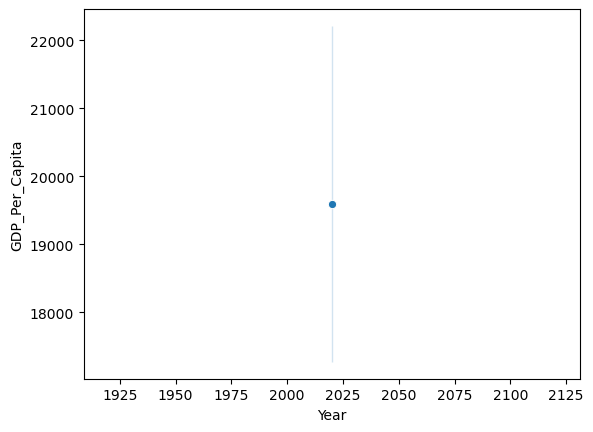

In [24]:
sns.lineplot(data=highest_gdp_2020, x='Year', y='GDP_Per_Capita', marker= 'o')
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [25]:
lowest_gdp = gdp_per_capita_2020.sort_values('GDP_Per_Capita', ascending=True)
lowest_gdp
#Burundi

,Country,Year,GDP_Per_Capita
973,Burundi,2020,711.355263
1217,Central African Republic,2020,847.765012
1630,Dem. Rep. Congo,2020,1044.071214
6273,Somalia,2020,1127.418534
5074,Niger,2020,1214.546556
...,...,...,...
681,Bermuda,2020,76117.804744
5746,Qatar,2020,89019.069857
3279,Ireland,2020,91356.855054
6108,Singapore,2020,94910.101431


14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors 

In [26]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 6083)

In [27]:
internet_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.600000,1
1,Afghanistan,2018,16.800000,2
2,Afghanistan,2017,13.500000,3
3,Afghanistan,2016,11.000000,4
4,Afghanistan,2015,8.260000,4
...,...,...,...,...
6078,Zimbabwe,1997,0.033080,NaN
6079,Zimbabwe,1996,0.016790,NaN
6080,Zimbabwe,1995,0.007684,NaN
6081,Zimbabwe,1994,0.001739,NaN


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [28]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df

,Country or Area,Year,Value
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


In [29]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.600000
1,Afghanistan,2018,16.800000
2,Afghanistan,2017,13.500000
3,Afghanistan,2016,11.000000
4,Afghanistan,2015,8.260000
...,...,...,...
6078,Zimbabwe,1997,0.033080
6079,Zimbabwe,1996,0.016790
6080,Zimbabwe,1995,0.007684
6081,Zimbabwe,1994,0.001739


16. Look at the number of observations in this dataset per year. What do you notice?

17. What is the first year to have a non-zero internet users percentage value?

In [30]:
first_non_zero = internet_df[internet_df['Internet_Users_Pct'] > 0]
first_year_non_zero = first_non_zero.sort_values('Year').iloc[0]['Year']
print(first_year_non_zero)

1990


18. How does the distribution of internet users percent differ for 2000 and 2014?

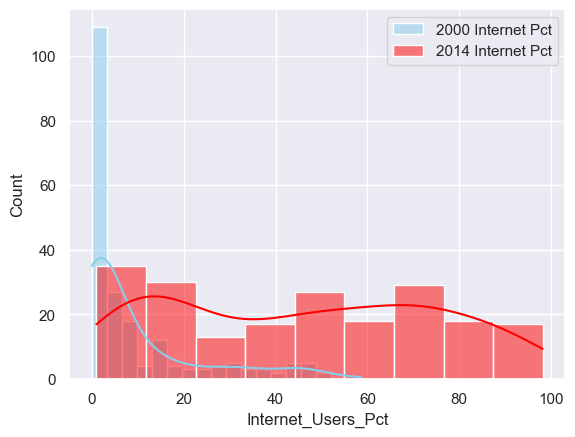

In [51]:
#plot two histograms on top of each other
#find a way to change transparency to where you can see the on each other

internet_2000 = internet_df.loc[internet_df["Year"].isin([2000])]
internet_2014 = internet_df.loc[internet_df["Year"].isin([2014])]

sns.set_theme(style="darkgrid")
df = sns.load_dataset("iris")

sns.histplot(internet_2000['Internet_Users_Pct'], color="skyblue", label="2000 Internet Pct", kde=True)
sns.histplot(internet_2014['Internet_Users_Pct'], color="red", label="2014 Internet Pct", kde=True)

plt.legend() 
plt.show()

#data=df means just the dataframe

19. For how many countries was the percentage of internet users below 5% in 2014?

In [36]:
twenty_fourteen_internet = internet_df.loc[internet_df.Year.isin([2014])]
twenty_fourteen_internet

less_than_five_pct = twenty_fourteen_internet[twenty_fourteen_internet['Internet_Users_Pct']<5]
less_than_five_pct

,Country,Year,Internet_Users_Pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [54]:
internet_df.Year = internet_df.Year.astype('int')

In [56]:
gdp_and_internet_use = pd.merge(internet_df, gdp_df, how = 'outer', on = ['Country','Year'])
gdp_and_internet_use

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
0,Afghanistan,2019,17.60,2079.921861
1,Afghanistan,2018,16.80,2060.698973
2,Afghanistan,2017,13.50,2096.093111
3,Afghanistan,2016,11.00,2101.422187
4,Afghanistan,2015,8.26,2108.714173
...,...,...,...,...
9107,Zambia,1992,NaN,2141.504615
9108,Zambia,1991,NaN,2232.837441
9109,Zimbabwe,1993,NaN,2458.783255
9110,Zimbabwe,1992,NaN,2468.278257


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [78]:
highest_int = gdp_and_internet_use.sort_values(by = 'Internet_Users_Pct', ascending = False).dropna()
highest_int

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
5716,United Arab Emirates,2022,100.0,74299.012980
5717,United Arab Emirates,2021,100.0,69733.793774
398,Bahrain,2022,100.0,51854.716371
4497,Qatar,2022,100.0,97096.935030
4498,Qatar,2021,100.0,92862.571798
...,...,...,...,...
1142,China,1990,0.0,1423.896348
4847,Senegal,1990,0.0,2469.603188
4818,Saudi Arabia,1990,0.0,42163.801725
1235,Colombia,1990,0.0,8434.959336


In [79]:
highest_int_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']== 2014]
highest_int_2014

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
5,Afghanistan,2014,7.0000,2144.449634
28,Albania,2014,54.3000,11586.817446
57,Algeria,2014,29.5000,11561.259795
87,Andorra,2014,86.1000,NaN
114,Angola,2014,21.3623,8183.164577
...,...,...,...,...
8902,The Gambia,2014,NaN,1885.142034
8964,Turks and Caicos Islands,2014,NaN,24661.145053
9002,Upper middle income,2014,NaN,14063.487284
9052,West Bank and Gaza,2014,NaN,5967.073437


In [75]:
highest_int.head(3)

,Country,Year,Internet_Users_Pct,GDP_Per_Capita
5,Afghanistan,2014,7.0,2144.449634
28,Albania,2014,54.3,11586.817446
57,Algeria,2014,29.5,11561.259795


22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?